In [1]:
# !pip install numpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import missingno as msno

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')#ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Kaggle House Prices Competition Kernel

## Read-in and examine train and test datasets

In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
print ("Size of train data : {}" .format(train.shape))
print ("Size of test data : {}" .format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


In [4]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the 'ID' colum since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

```python
```
## Exploratory data analysis and light cleaning 

We can begin by looking at the distribution of our target--SalePrice


 mu = 180921.20 and sigma = 79415.29



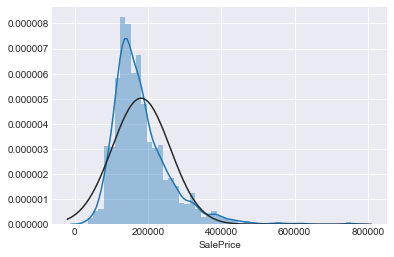

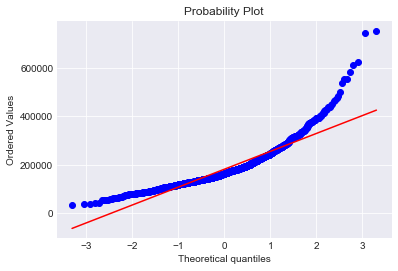

In [5]:
def check_skewness(col):
    """ Plot distribution and descriptive stats"""
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    
    # Get the fitted parameters used by the function
    (mu, stddev) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, stddev))
check_skewness('SalePrice')

Our target looks positively skewed based on the histogram, kde, and QQ plot. Next, let's look at the distribution and correlation of some of the more import features.

We'll select only features with a correlation coef with a magnitude greater than .5; we generally get the most information and predictive power from these features.

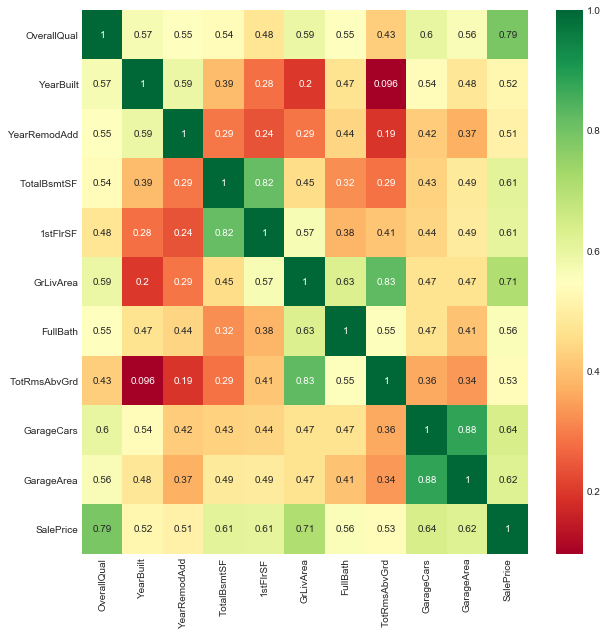

In [6]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Below we can see the bivariate scatter plots as well as univariate distributions for all of the features most highly correlated with our target.
Looking at the top row, we can see that our target is positively skewed and that all of these features are positively correlated with our target, as well as with each other in most cases displayed here.

Also, looking at the diagonal we can see that most of these features are approximately normal distributed. We will end up standardizing the skewed features later on to improve the performance of the model.

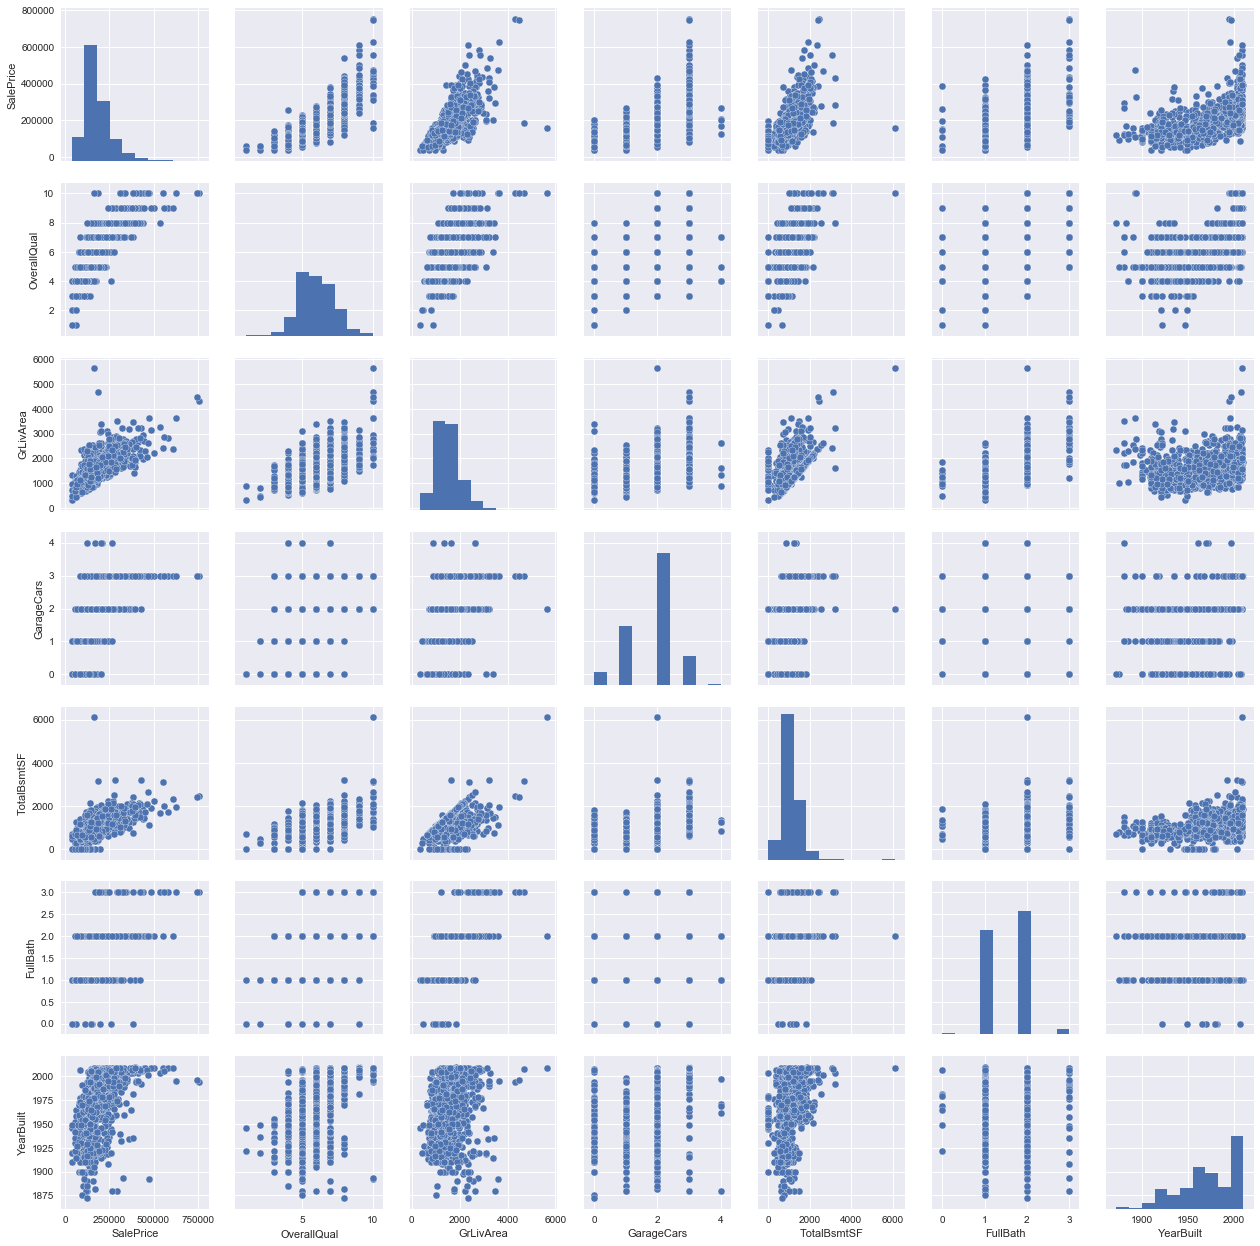

In [7]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

We can see from both the plot above and below that the OverallQual feature has a strong positive non-linear correlation with our target. (SalePrice)

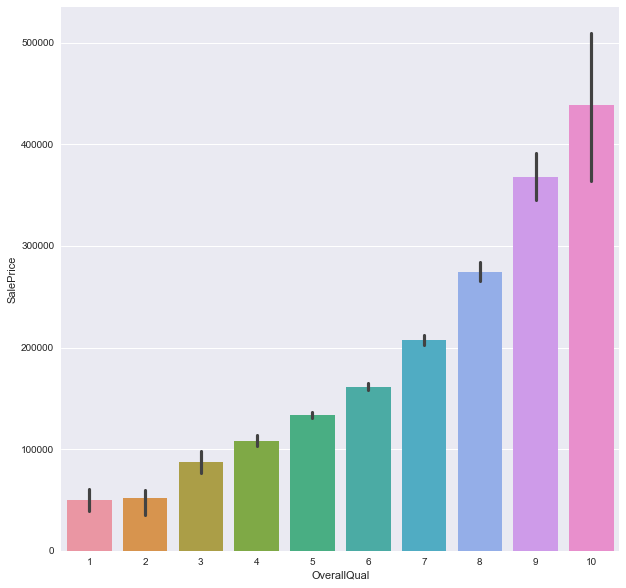

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(train.OverallQual,train.SalePrice)

Let's see if we can do some cleaning using two of our features most highly correlated with the trget--GrLivArea and OverallQual

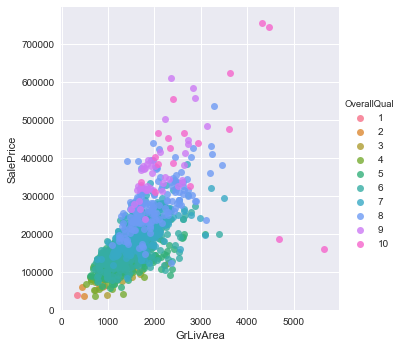

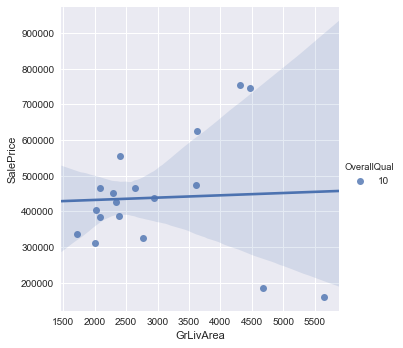

In [9]:
graph1 =    sns.lmplot(x = 'GrLivArea', 
                       y = 'SalePrice',
                       hue = 'OverallQual', 
                       data = train,
                       fit_reg = False)

graph2 =    sns.lmplot(x = 'GrLivArea', 
                       y = 'SalePrice',
                       hue = 'OverallQual', 
                       data = train[train['OverallQual'] == 10],
                       fit_reg = True)


When grouped by overall house quality, we can see two outliers that clearly don't follow the relationship between price and living area; we drop these observations below.

In [10]:
train = train.loc[(train['GrLivArea'] < 4000) | (train['SalePrice'] > 600000) ,:]

## Restructure data and continuing cleaning

Let's continue cleaning our features. 

At this point we will seperate our features from our target, since we have no more cleaning to do on it.

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]

# target values to train with
y_train = train['SalePrice'].values


One remark is that below we will be stacking our training and test data into one dataset that we will use for all imputation.

On a real project, we wouldn't have the luxury of imputing based on our test data, so in a way we are creating a data leakage problem and we could be overfitting to our test data, but for now we will carry on for two reasons: one, we will assume that the more data we have, the more accurate our imputation techniques will be, and two, we need to impute the test data for our submission file. 

We can check the validity of the first assumption by creating a different dataset and model, free of the data linkage problem, and comparing it's result with the results from this model, using the kaggle leaderboard.


In [12]:
# concatenate train and test and drop target so we can impute all x values, 
# instead of just x-vals from train
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

# look at size of all data
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### Missing data and imputation 

Before we start imputing, we will get an idea of how much missing data we have overall.

In [13]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

Text(0.5,1,'Percent missing data by feature')

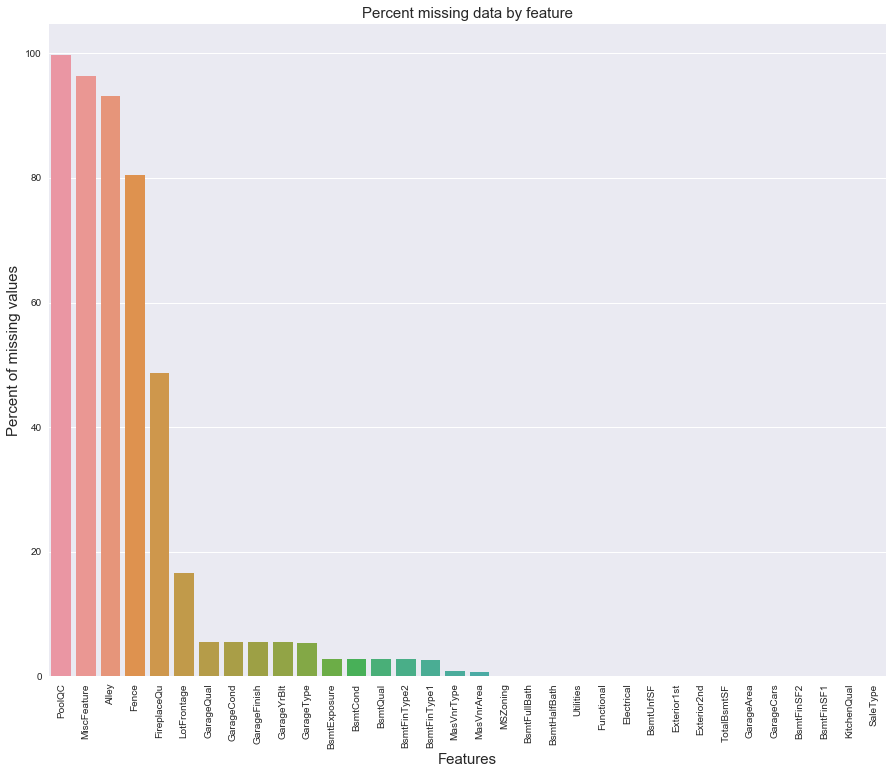

In [14]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


Wow, some of our features have a lot of missing values!. Look below for counts in addition to the missing rates above.

In [15]:
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na, 'Missing Count': all_data.isnull().sum()[all_data.isnull().any()]})
missing_data.sort_values(by = 'Missing Ratio', ascending = False)

,Missing Ratio,Missing Count
PoolQC,99.691464,2908
MiscFeature,96.400411,2812
Alley,93.212204,2719
Fence,80.425094,2346
FireplaceQu,48.680151,1420
LotFrontage,16.660953,486
GarageCond,5.450806,159
GarageQual,5.450806,159
GarageYrBlt,5.450806,159
GarageFinish,5.450806,159


Also, below we can see the nullity correlation between features. The blank squares imply a correlation coefficient of close to 0. 

It is interesting to see the pairs with correlation of one that are not on the diagonal; these feature pairs/combinations have all of their missing values in the same rows, we will come back to these later.

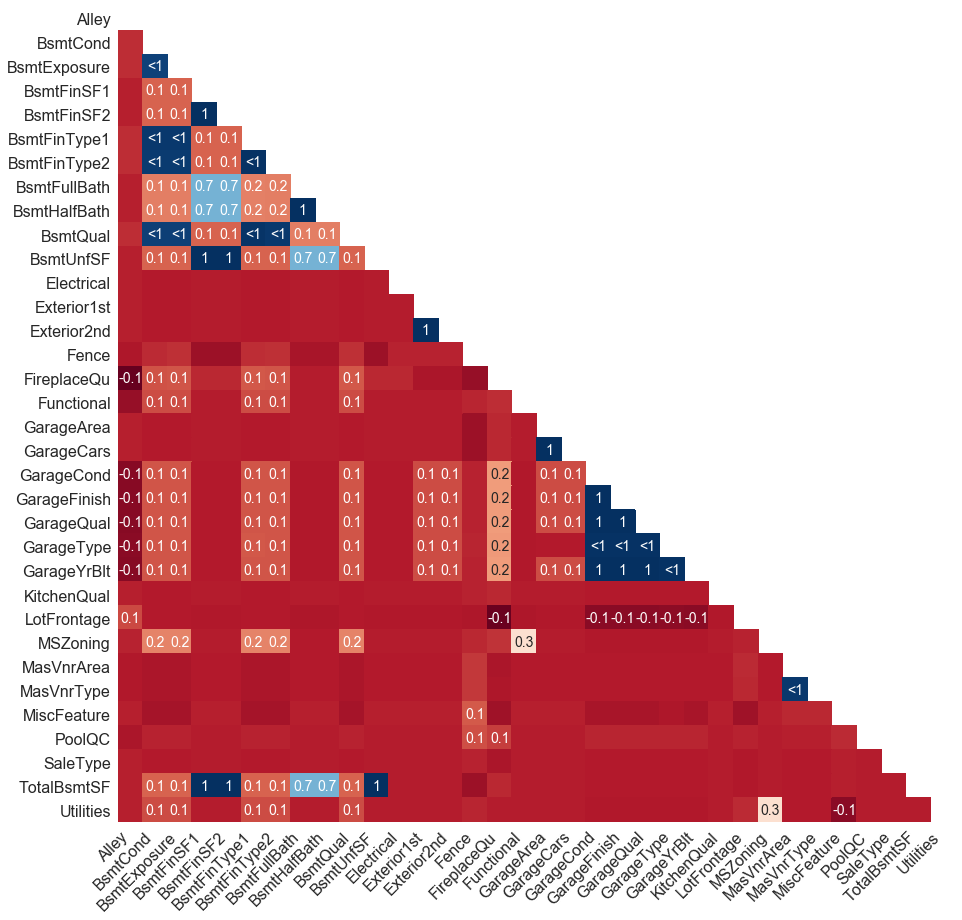

In [16]:
msno.heatmap(all_data[all_data.isnull().sum()[all_data.isnull().any()].index], figsize=(15, 15))

In [17]:
missing_vals_str = train.select_dtypes(include = ['object']).isna().sum()
missing_vals_str[missing_vals_str != 0].sort_values(ascending=False)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

### Imputation for data missing not at random (MNAR)

We can see the 9 out of 2717 non missing values for PoolQC below. 4 excellent, 3 good and 2 fair. 

In [18]:
all_data['PoolQC'].value_counts(dropna = False)

NaN    2908
Ex        4
Gd        3
Fa        2
Name: PoolQC, dtype: int64

We have no other info from other features to confidently impute missing values for this feature, so we will impute with none.

In [19]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

We will follow the same procedure for the following features with string values; if there doesn't seem to be other features that can be used as indicators for informed imputation, we will impute 'None'.

In [20]:
all_data['MiscFeature'].loc[all_data['MiscFeature'].notnull()].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [21]:
# MiscFeature missing at random, no info from other features--impute with 'None'
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [22]:
all_data['Alley'].loc[all_data['Alley'].notnull()].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [23]:
# Alley missing at random, no info from other features--impute with 'None'
all_data["Alley"] = all_data["Alley"].fillna("None")

In [24]:
all_data['Fence'].loc[all_data['Fence'].notnull()].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [25]:
# Fence missing at random, no info from other features--impute with 'None'
all_data["Fence"] = all_data["Fence"].fillna("None")

In [26]:
all_data['FireplaceQu'].loc[all_data['FireplaceQu'].notnull()].value_counts()

Gd    742
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [27]:
# Fireplace quality missing at random, no info from other features--impute with 'None'
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

### LotFrontage imputation

Next, let's work on the imputation for some continous features. 

Below we will begin by looking at the "LotFrontage" (Linear feet of street connected to property) feature.


In [28]:
# Grouping by Neighborhood and Check the LotFrontage. Most of the grouping has similar areas
grouped_df = all_data.groupby('Neighborhood')['LotFrontage']

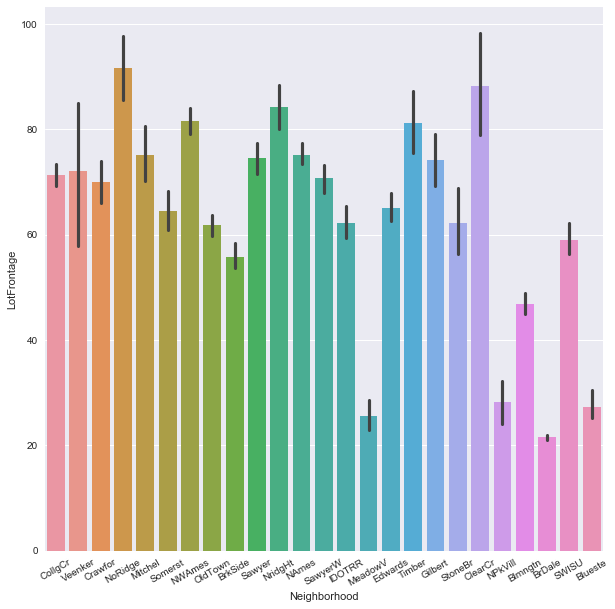

In [29]:
plt.figure(figsize=(10,10))
g= sns.barplot(all_data['Neighborhood'],all_data['LotFrontage'])
g = g.set_xticklabels(g.get_xticklabels(),rotation=30)

We can see that the average lot frontage varies greatly between neighborhoods but has fairly tight ranges within neighborhoods. This is intuitive as property sizes within neighborhood tend to be similar.

In [30]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Garage feature imputation

We are going to go a bit out of order and address all garage features, which contain both numerical and categorical data.

In [31]:
# Create a list of all garage related features
garage_cols = [col for col in all_data if col.startswith('Garage')]

for feat in garage_cols:
    print("{} has {} missing values".format(feat, all_data[feat].isna().sum()))

GarageArea has 1 missing values
GarageCars has 1 missing values
GarageCond has 159 missing values
GarageFinish has 159 missing values
GarageQual has 159 missing values
GarageType has 157 missing values
GarageYrBlt has 159 missing values


In [32]:
# Create an index for all obs with at least one missing garage related value
miss_gar_inds = pd.isnull(all_data[garage_cols]).any(1).nonzero()[0]

Below we will plot missing values in a graph and table; missing values in the graph are represented by then light grey/white rectangles and as -99 in the table.

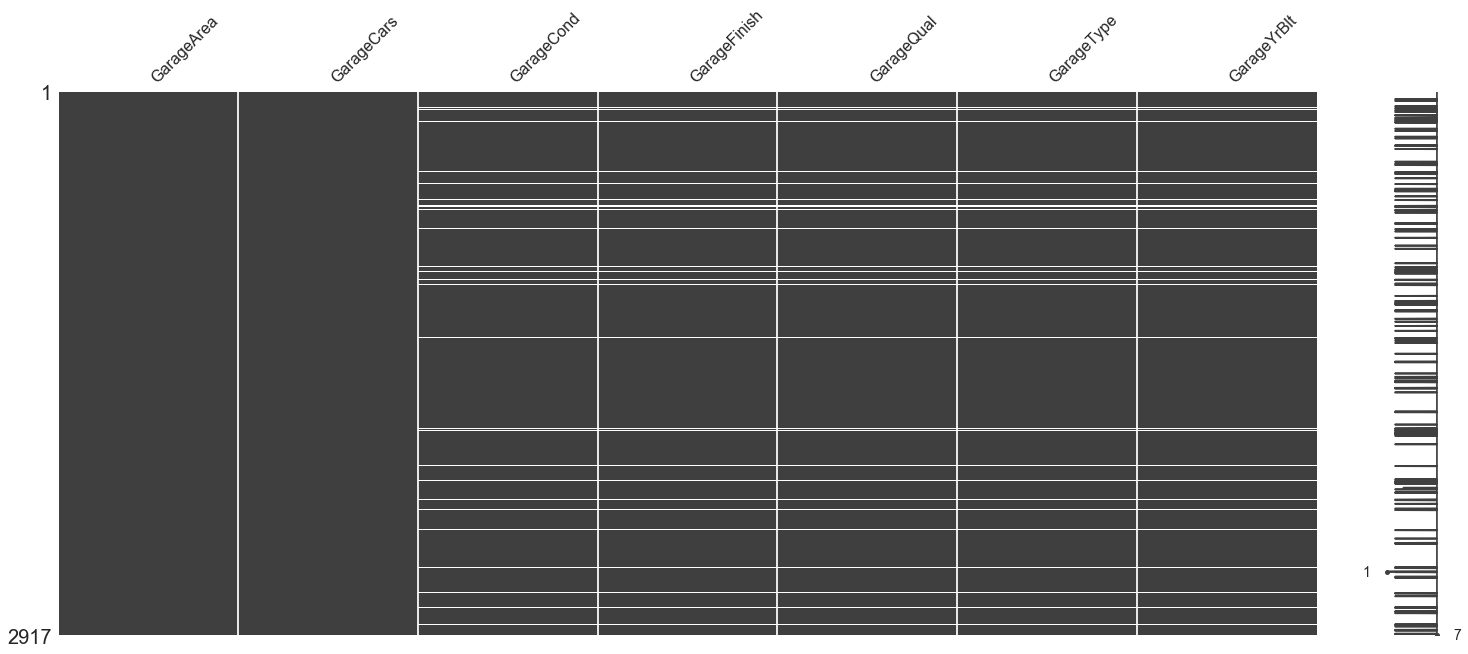

In [33]:
msno.matrix(all_data[garage_cols])

In [34]:
all_data2 = all_data.copy().fillna(-99)
all_data2.iloc[miss_gar_inds].groupby(garage_cols)[garage_cols].count()

,,,,,,,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,,,,,,,
-99.0,-99.0,-99,-99,-99,Detchd,-99.0,1,1,1,1,1,1,1
0.0,0.0,-99,-99,-99,-99,-99.0,157,157,157,157,157,157,157
360.0,1.0,-99,-99,-99,Detchd,-99.0,1,1,1,1,1,1,1


We can infer that the home doesn't have a garage when all of our garage features are missing at the same time, this is generally the case--let's impute all missing with 'None' for categorical features and 0 for numerical features.

In [35]:
# Impute categorical features with 'None'
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')
    
# Impute numeric features with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

# Basement feature imputation

We are going to go a bit out of order to address all basement features, which contain both numerical and categorical data.

In [36]:
# Create a list of all basement related features
bsmt_cols = [col for col in all_data if col.startswith('Bsmt')]

for feat in bsmt_cols:
    print("{} has {} missing values".format(feat, all_data[feat].isna().sum()))

BsmtCond has 82 missing values
BsmtExposure has 82 missing values
BsmtFinSF1 has 1 missing values
BsmtFinSF2 has 1 missing values
BsmtFinType1 has 79 missing values
BsmtFinType2 has 80 missing values
BsmtFullBath has 2 missing values
BsmtHalfBath has 2 missing values
BsmtQual has 81 missing values
BsmtUnfSF has 1 missing values


In [37]:
# Create an index for all obs with at least one missing basement related value
miss_bsmt_inds = pd.isnull(all_data[bsmt_cols]).any(1).nonzero()[0]

Below we will plot missing values in a graph and table; missing values in the graph are represented by then light grey/white rectangles and as -99 in the table.


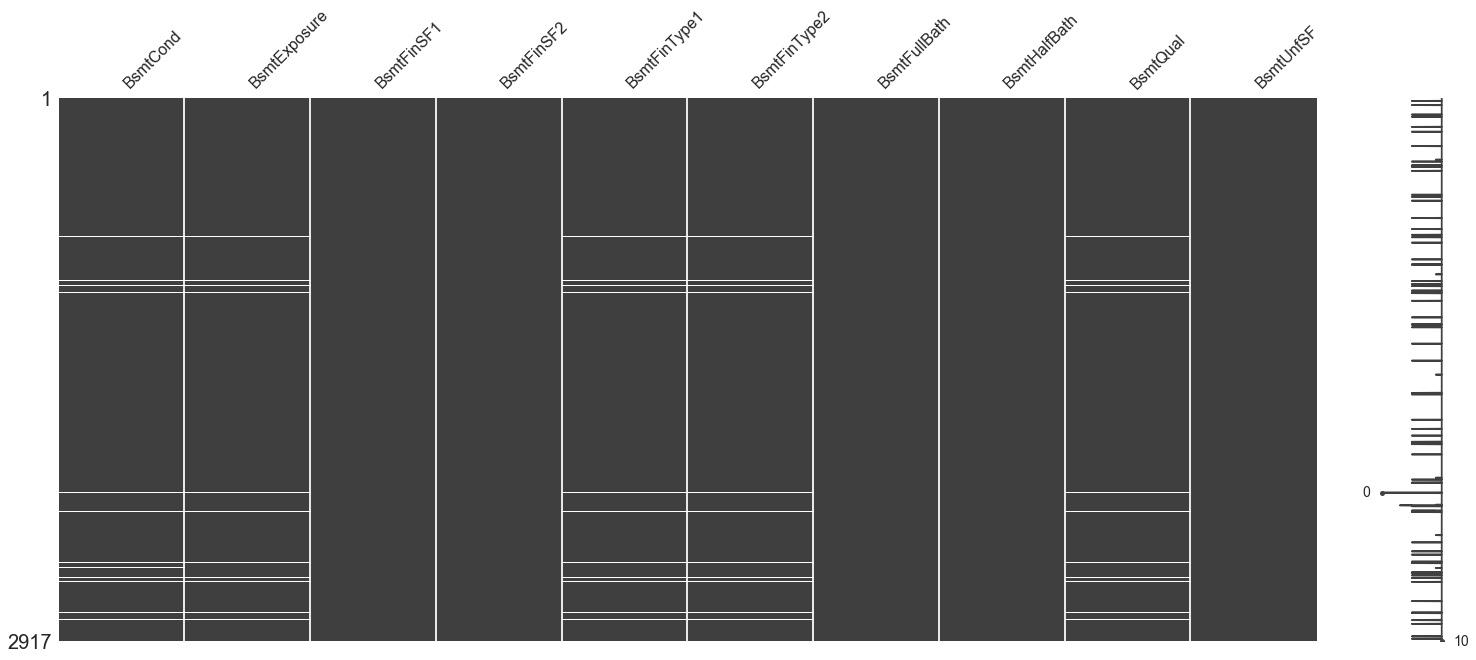

In [38]:
msno.matrix(all_data[bsmt_cols]) 

In [39]:
all_data2.iloc[miss_bsmt_inds].groupby(bsmt_cols)[bsmt_cols].count()

BsmtCond  \
BsmtCond BsmtExposure BsmtFinSF1 BsmtFinSF2 BsmtFinType1 BsmtFinType2 BsmtFullBath BsmtHalfBath BsmtQual BsmtUnfSF             
-99      -99          -99.0      -99.0      -99          -99          -99.0        -99.0        -99      -99.0             1   
                       0.0        0.0       -99          -99          -99.0        -99.0        -99       0.0              1   
                                                                       0.0          0.0         -99       0.0             77   
         Av            755.0      0.0       ALQ          Unf           0.0          0.0         TA        240.0            1   
         Mn            1044.0     382.0     GLQ          Rec           1.0          0.0         Gd        0.0              1   
         No            1033.0     0.0       BLQ          Unf           0.0          1.0         TA        94.0             1   
Fa       No            0.0        0.0       Unf          Unf           0.0          0.0         -99       173.0            1   
TA       -99           0.0        0.0       Unf          Unf           0.0          0.0         Gd        725.0            1   
                                                                                                          936.0            1   
                                                                                                          1595.0           1   
         No            0.0        0.0       Unf          Unf           0.0          0.0         -99       356.0            1   
                       1124.0     479.0     GLQ          -99           1.0          0.0         Gd        1603.0           1   

                                                                                                                    BsmtExposure  \
BsmtCond BsmtExposure BsmtFinSF1 BsmtFinSF2 BsmtFinType1 BsmtFinType2 BsmtFullBath BsmtHalfBath BsmtQual BsmtUnfSF                 
-99      -99          -99.0      -99.0      -99          -99          -99.0        -99.0        -99      -99.0                 1   
                       0.0        0.0       -99          -99          -99.0        -99.0        -99       0.0                  1   
                                                                       0.0          0.0         -99       0.0                 77   
         Av            755.0      0.0       ALQ          Unf           0.0          0.0         TA        240.0                1   
         Mn            1044.0     382.0     GLQ          Rec           1.0          0.0         Gd        0.0                  1   
         No            1033.0     0.0       BLQ          Unf           0.0          1.0         TA        94.0                 1   
Fa       No            0.0        0.0       Unf          Unf           0.0          0.0         -99       173.0                1   
TA       -99           0.0        0.0       Unf          Unf           0.0          0.0         Gd        725.0                1   
                                                                                                          936.0                1   
                                                                                                          1595.0               1   
         No            0.0        0.0       Unf          Unf           0.0          0.0         -99       356.0                1   
                       1124.0     479.0     GLQ          -99           1.0          0.0         Gd        1603.0               1   

                                                                                                                    BsmtFinSF1  \
BsmtCond BsmtExposure BsmtFinSF1 BsmtFinSF2 BsmtFinType1 BsmtFinType2 BsmtFullBath BsmtHalfBath BsmtQual BsmtUnfSF               
-99      -99          -99.0      -99.0      -99          -99          -99.0        -99.0        -99      -99.0               1   
                       0.0        0.0       -99          -99          -99.0        -

We can infer that the home doesn't have a basement when all of our garage features are missing at the same time, this is generally the case--let's impute all missing with 'None' for categorical features and 0 for numerical features.

In [40]:
# Impute categorical features with 'None'
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
# Impute numeric features with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    

# We are going to go a bit out of order to address all Masonry veneer features, which contain both numerical and categorical data.

In [41]:
# Create a list of all basement related features
mas_cols = [col for col in all_data if col.startswith('Mas')]

for feat in mas_cols:
    print("{} has {} missing values".format(feat, all_data[feat].isna().sum()))

MasVnrArea has 23 missing values
MasVnrType has 24 missing values


In [42]:
# Create an index for all obs with at least one missing basement related value
miss_mas_inds = pd.isnull(all_data[mas_cols]).any(1).nonzero()[0]

In [43]:
all_data2.iloc[miss_mas_inds].groupby(mas_cols)[mas_cols].count()

,,MasVnrArea,MasVnrType
MasVnrArea,MasVnrType,,
-99.0,-99,23,23
198.0,-99,1,1


A vast majority (23/24) of our rows have a missing value have 0 for numeric and missing categorical variables. 

It seems like these houses are missing masonary veneers, and if not, we can't say anything meaningful about their missing masonry feature values. We will follow the rule for the previous features--impute numeric features with 0 and categorical features with 'none'.

In [44]:
# Impute categorical features with 'None'
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
   
# Impute numeric features with 0
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [45]:
missing_vals_by_var = all_data.isna().sum()
missing_vals_by_var[all_data.isna().any()].sort_values(ascending=False)

MSZoning       4
Utilities      2
Functional     2
SaleType       1
KitchenQual    1
Exterior2nd    1
Exterior1st    1
Electrical     1
dtype: int64

Next, we will impute values for our features with lower missinngness rates that seem like real missing values, as opposed to the missing values we infered were a result of the house not having a basement, garage, or masonry veneer.

In [46]:
all_data['MSZoning'].value_counts(dropna = False)

RL         2263
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [47]:
# Impute missing values with mode for a quick solution
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [48]:
all_data['Utilities'].value_counts(dropna = False)

AllPub    2914
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

All but one value is AllPub; this features provides us very little information to contribute to our model and it is incomplete, so we will drop it.


In [49]:
all_data = all_data.drop(['Utilities'], axis=1)

In [50]:
all_data['Functional'].value_counts(dropna = False)

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [51]:
# Impute missing values with 'Typ', which is both the mode and the baseline for this ordinal feature
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Let's take a look at the four categorical features with 1 missing value.

In [52]:
mode_cols = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']

for feat in mode_cols:
    print("{} has {} missing values".format(feat, all_data[feat].isna().sum()))

Electrical has 1 missing values
KitchenQual has 1 missing values
Exterior1st has 1 missing values
Exterior2nd has 1 missing values
SaleType has 1 missing values


In [53]:
# Create an index for all obs with at least one missing basement related value
miss_mode_inds = pd.isnull(all_data[mode_cols]).any(1).nonzero()[0]
all_data2.iloc[miss_mode_inds].groupby(mode_cols)[mode_cols].count()

Electrical  \
Electrical KitchenQual Exterior1st Exterior2nd SaleType               
-99        Gd          VinylSd     VinylSd     WD                 1   
SBrkr      -99         Wd Sdng     Wd Sdng     COD                1   
           Fa          -99         -99         WD                 1   
           TA          Plywood     Plywood     -99                1   

                                                         KitchenQual  \
Electrical KitchenQual Exterior1st Exterior2nd SaleType                
-99        Gd          VinylSd     VinylSd     WD                  1   
SBrkr      -99         Wd Sdng     Wd Sdng     COD                 1   
           Fa          -99         -99         WD                  1   
           TA          Plywood     Plywood     -99                 1   

                                                         Exterior1st  \
Electrical KitchenQual Exterior1st Exterior2nd SaleType                
-99        Gd          VinylSd     VinylSd     WD                  1   
SBrkr      -99         Wd Sdng     Wd Sdng     COD                 1   
           Fa          -99         -99         WD                  1   
           TA          Plywood     Plywood     -99                 1   

                                                         Exterior2nd  SaleType  
Electrical KitchenQual Exterior1st Exterior2nd SaleType                         
-99        Gd          VinylSd     VinylSd     WD                  1         1  
SBrkr      -99         Wd Sdng     Wd Sdng     COD                 1         1  
           Fa          -99         -99         WD                  1         1  
           TA          Plywood     Plywood     -99                 1         1

For the four features above, there does not seem to be a relationship to the missingness, so we will try to introduce as little bias as possible into the data with the imputation process by filling with the mode. However, imputing with the mode does give us biased estimates of the variance and covariance.

In [54]:
for col in mode_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [55]:
all_data['MSSubClass'].value_counts(dropna = False)

20     1079
60      573
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [56]:
# missing_data = pd.DataFrame({'Missing Ratio' :all_data_na, 'Missing Count': all_data.isnull().sum()[all_data.isnull().any()]})
# missing_data.sort_values(by = 'Missing Ratio', ascending = False)

In [57]:
# all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

CONSIDER PUTTING CODE BELOW AT BEGGINNING

In [58]:
# #Check remaining missing values if any 
# all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
# missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
# missing_data.head()

In [59]:
all_data['OverallCond'].value_counts(dropna = False)

5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [60]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [61]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [62]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [63]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [64]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [65]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 220)

In [66]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(1458, 220)

In [67]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


C:\Users\test\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [68]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [69]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 25749.3682 (2162.6451)



In [70]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 30728.9966 (2635.5848)



In [71]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 30543.8031 (2661.3193)



In [72]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 22941.5818 (2916.0222)



In [73]:
LassoMd = lasso.fit(train.values,y_train)
ENetMd = ENet.fit(train.values,y_train)
KRRMd = KRR.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)

In [74]:
finalMd = ((LassoMd.predict(test.values)) + (ENetMd.predict(test.values)) + (KRRMd.predict(test.values)) + (GBoostMd.predict(test.values)) ) / 4
finalMd

array([117908.32284427, 168188.61558666, 184637.7213613 , ...,
       170830.64210976, 117753.86297032, 222768.33390721])

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
# ensembles
ensembles = []
ensembles.append(('ScaledAB', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('GBM',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5))])))
ensembles.append(('ScaledRF', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', 
                  Pipeline([('Scaler', StandardScaler()), 
                            ('ET', ExtraTreesRegressor())])))
ensembles.append(('RobustScaledGBM',
                   Pipeline([('RobustScaler', RobustScaler()),
                             ('GBM', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5))])))
ensembles.append(('RobustScaledGBM2',
                   Pipeline([('RobustScaler', RobustScaler()),
                             ('GBM2', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, random_state =5))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=n_folds, random_state=7)
    cv_results = np.sqrt(-cross_val_score(model, train.values, y_train, cv=kfold, scoring="neg_mean_squared_error"))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 31280.620052 (2545.246982)
ScaledGBM: 22941.131605 (2915.530275)
ScaledRF: 27696.669973 (2935.097218)
ScaledET: 26196.094045 (2579.555458)
RobustScaledGBM: 22941.443507 (2915.925542)
RobustScaledGBM2: 22334.840282 (2087.270219)
